In [50]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import os
import csv
from config import gkey

In [3]:
# File paths
census_data = "../Desktop/census_2017_4merge.csv"
atm_data = "../Desktop/ATM_1000x_cleaned_4merge.csv"
census_atm = "../Desktop/census_2017_new.csv"
split_atm = "../Desktop/ATM_1000x_cleaned_4merge_split.csv"

# Import the data into a Pandas DataFrame
census_df = pd.read_csv(census_data)
atm_df = pd.read_csv(atm_data)
census_atm_df = pd.read_csv(census_atm)
split_atm_df = pd.read_csv(split_atm)


In [4]:
census_df.head()

,index,Zipcode,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,Unemployment Rate,...,Bachelors,Masters,Professional,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty
0,7025,23005,16337.0,12962.0,2555.0,786.0,201.0,37.8,52.402522,29.534186,...,2366.0,911.0,171.0,268.0,1665.0,10.191590,1287.0,268.0,304.0,55.0
1,7047,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,7550.0,4350.0,1304.0,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0
2,7048,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,7825.0,3579.0,749.0,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0
3,7051,23063,4466.0,2735.0,1618.0,112.0,3.0,44.0,51.724138,33.116883,...,457.0,147.0,47.0,34.0,217.0,4.858934,98.0,119.0,0.0,0.0
4,7077,23111,37417.0,32378.0,3276.0,903.0,555.0,42.5,55.621776,24.579736,...,6136.0,1771.0,264.0,246.0,2134.0,5.703290,1559.0,389.0,106.0,62.0


In [5]:
census_df.columns

Index(['index', 'Zipcode', 'Population', 'White Population',
       'Black Population', 'Hispanic Population', 'Asian Population',
       'Median Age', 'Employment Rate', 'Unemployment Rate',
       'Household Income', 'Per Capita Income', 'Avg Rent',
       'Avg Rent & Utilities', 'Median Home Value', 'Avg Monthly Cost of Home',
       'No HSch Ed', 'HSch/GED', 'Associate College', 'Bachelors', 'Masters',
       'Professional', 'Doctorate', 'Poverty Count', 'Poverty Rate',
       'White Poverty', 'Black Poverty', 'Hispanic Poverty', 'Asian Poverty'],
      dtype='object')

In [6]:
# BarPlot 1
# Create and name Household Income bins 
bins = [0, 35000, 70000, 100000,150000]
bin_label_1 = ["<35","70-100K","100-120K",">120K"]

In [7]:
# Add new bin column to df
census_atm_df["HHI Segment"] = pd.cut(census_atm_df["Household Income"], bins, labels=bin_label_1)
census_atm_df.head()

,index,Zipcode,ATM_count,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,...,Masters,Professional,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty,HHI Segment
0,7025,23005,1,16337,12962,2555,786,201,37.8,52.402522,...,911,171,268,1665,10.191590,1287,268,304,55,70-100K
1,7047,23059,2,34031,23175,3230,1277,6288,41.0,53.051629,...,4350,1304,843,1044,3.067791,655,249,25,124,>120K
2,7048,23060,13,37381,23419,7305,1857,4823,37.8,58.486932,...,3579,749,337,1737,4.646746,1038,486,83,144,100-120K
3,7051,23063,1,4466,2735,1618,112,3,44.0,51.724138,...,147,47,34,217,4.858934,98,119,0,0,70-100K
4,7077,23111,8,37417,32378,3276,903,555,42.5,55.621776,...,1771,264,246,2134,5.703290,1559,389,106,62,100-120K


In [8]:
# Using GroupBy in order to separate the data into fields according to "bin" values
ATM_BY_HHI_Segments_df = census_atm_df.groupby('HHI Segment')["ATM_count"].sum()

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(ATM_BY_HHI_Segments_df)

# In order to be visualized, a data function must be used...
ATM_BY_HHI_Segments_df.count()

HHI Segment
<35          8
70-100K     44
100-120K    62
>120K       32
Name: ATM_count, dtype: int64


4

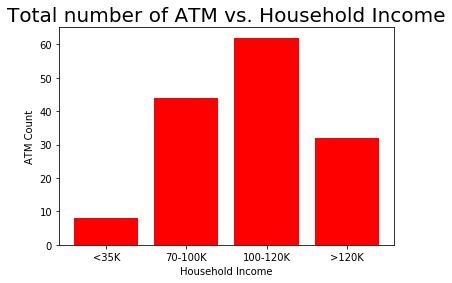

In [10]:
# Tell matplotlib that we will be making a bar chart
# x-axis is household income and y-axis is ATM count
x1 = ["<35K", "70-100K", "100-120K", ">120K"]
y1 = [8, 44, 62, 32]
x_axis = np.arange(len(y1))

# Create a bar chart based upon the above data
plt.bar(x_axis, y1, color="b", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x1]
#plt.xticks(tick_locations, [value for value in x1])

# Incorporate the other graph properties
plt.title('Total number of ATM vs. Household Income', fontsize=20)
plt.xlabel('Household Income')
plt.ylabel('ATM Count')

plt.bar(x1, y1, color='r', alpha=1, align="center")

plt.savefig("../Desktop/Bar_HHI_ATM.png")

In [11]:
# BarPlot 2
# Create population bins 
bins = [0, 10000,20000, 30000,40000,70000]
bin_label_2 = ["<10K","10-20K","20-30K","40-50K",">50K"]

In [12]:
# Add new bin column to df
census_atm_df["Population Segment"] = pd.cut(census_atm_df["Population"], bins, labels=bin_label_2)
census_atm_df.head()

,index,Zipcode,ATM_count,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,...,Professional,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty,HHI Segment,Population Segment
0,7025,23005,1,16337,12962,2555,786,201,37.8,52.402522,...,171,268,1665,10.191590,1287,268,304,55,70-100K,10-20K
1,7047,23059,2,34031,23175,3230,1277,6288,41.0,53.051629,...,1304,843,1044,3.067791,655,249,25,124,>120K,40-50K
2,7048,23060,13,37381,23419,7305,1857,4823,37.8,58.486932,...,749,337,1737,4.646746,1038,486,83,144,100-120K,40-50K
3,7051,23063,1,4466,2735,1618,112,3,44.0,51.724138,...,47,34,217,4.858934,98,119,0,0,70-100K,<10K
4,7077,23111,8,37417,32378,3276,903,555,42.5,55.621776,...,264,246,2134,5.703290,1559,389,106,62,100-120K,40-50K


In [13]:
# Using GroupBy in order to separate the data into fields according to "bin" values
ATM_BY_Pop_Segments_df = census_atm_df.groupby('Population Segment')["ATM_count"].sum()

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(ATM_BY_Pop_Segments_df)

# In order to be visualized, a data function must be used...
ATM_BY_Pop_Segments_df.count()

Population Segment
<10K      13
10-20K    12
20-30K    18
40-50K    66
>50K      37
Name: ATM_count, dtype: int64


5

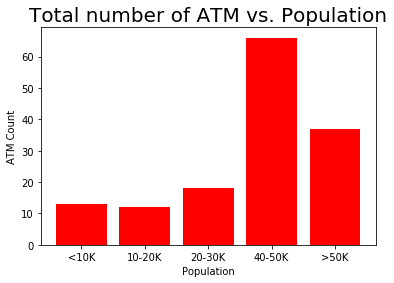

In [14]:
# Tell matplotlib that we will be making a bar chart
# population is our y axis and x_axis is ATM count
# We apply align="edge" to ensure our bars line up with our tick marks
x2 = ["<10K", "10-20K", "20-30K", "40-50K", ">50K"]
y2 = [13, 12, 18, 66, 37]
x_axis = np.arange(len(y2))

# Create a bar chart based upon the above data
plt.bar(x2, y2, color="r", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x1]
#plt.xticks(tick_locations, [value for value in x1])

# Incorporate the other graph properties
plt.title('Total number of ATM vs. Population', fontsize=20)
plt.xlabel('Population')
plt.ylabel('ATM Count')


#plt.bar(x1, y1, color='r', alpha=1, align="center")

plt.savefig("../Desktop/Bar_Population_ATM.png")

In [15]:
# BarPlot 3
# Create rent bins 
bins = [0, 700, 850, 1000, 1150, 1300, 2000]
bin_label_3 = ["<700","700-850","850-1000","1000-1150","1150-1300",">1300"]

In [16]:
census_atm_df["Rent Segment"] = pd.cut(census_atm_df["Avg Rent"], bins, labels=bin_label_3)
census_atm_df.head()

,index,Zipcode,ATM_count,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,...,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty,HHI Segment,Population Segment,Rent Segment
0,7025,23005,1,16337,12962,2555,786,201,37.8,52.402522,...,268,1665,10.191590,1287,268,304,55,70-100K,10-20K,700-850
1,7047,23059,2,34031,23175,3230,1277,6288,41.0,53.051629,...,843,1044,3.067791,655,249,25,124,>120K,40-50K,1150-1300
2,7048,23060,13,37381,23419,7305,1857,4823,37.8,58.486932,...,337,1737,4.646746,1038,486,83,144,100-120K,40-50K,1000-1150
3,7051,23063,1,4466,2735,1618,112,3,44.0,51.724138,...,34,217,4.858934,98,119,0,0,70-100K,<10K,700-850
4,7077,23111,8,37417,32378,3276,903,555,42.5,55.621776,...,246,2134,5.703290,1559,389,106,62,100-120K,40-50K,850-1000


In [17]:
# Using GroupBy in order to separate the data into fields according to "bin" values
ATM_BY_Rent_Segments_df = census_atm_df.groupby('Rent Segment')["ATM_count"].sum()

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(ATM_BY_Rent_Segments_df)

# In order to be visualized, a data function must be used...
ATM_BY_Rent_Segments_df.count()

Rent Segment
<700          2
700-850      38
850-1000     25
1000-1150    74
1150-1300     6
>1300         1
Name: ATM_count, dtype: int64


6

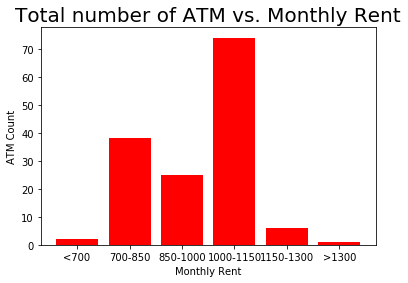

In [18]:
# Tell matplotlib that we will be making a bar chart
# population is our y axis and x_axis is ATM count
# We apply align="edge" to ensure our bars line up with our tick marks
x3 = ["<700","700-850","850-1000","1000-1150","1150-1300",">1300"]
y3 = [2, 38, 25, 74, 6, 1]
x_axis = np.arange(len(y3))

# Create a bar chart based upon the above data
plt.bar(x3, y3, color="r", align="center")

# Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x1]
#plt.xticks(tick_locations, [value for value in x1])

# Incorporate the other graph properties
plt.title('Total number of ATM vs. Monthly Rent', fontsize=20)
plt.xlabel('Monthly Rent')
plt.ylabel('ATM Count')


#plt.bar(x1, y1, color='r', alpha=1, align="center")

plt.savefig("../Desktop/Bar_Rent_ATM.png")

In [19]:
# Long plot different data sets
census_df.head()

,index,Zipcode,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,Unemployment Rate,...,Bachelors,Masters,Professional,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty
0,7025,23005,16337.0,12962.0,2555.0,786.0,201.0,37.8,52.402522,29.534186,...,2366.0,911.0,171.0,268.0,1665.0,10.191590,1287.0,268.0,304.0,55.0
1,7047,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,7550.0,4350.0,1304.0,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0
2,7048,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,7825.0,3579.0,749.0,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0
3,7051,23063,4466.0,2735.0,1618.0,112.0,3.0,44.0,51.724138,33.116883,...,457.0,147.0,47.0,34.0,217.0,4.858934,98.0,119.0,0.0,0.0
4,7077,23111,37417.0,32378.0,3276.0,903.0,555.0,42.5,55.621776,24.579736,...,6136.0,1771.0,264.0,246.0,2134.0,5.703290,1559.0,389.0,106.0,62.0


In [20]:
atm_df.head()

,Name,Lat,Lon,zip_code,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Wells Fargo Bank,37.757910,-77.471018,23005,NaN,NaN,NaN,NaN
1,SunTrust,37.678216,-77.586356,23059,NaN,NaN,NaN,NaN
2,Wells Fargo Bank,37.667405,-77.460081,23059,NaN,NaN,NaN,NaN
3,ATM (East Coast),37.643165,-77.564741,23060,NaN,NaN,NaN,NaN
4,ATM Partners Financia,37.651729,-77.460410,23060,NaN,NaN,NaN,NaN


In [21]:
#removing unexpected columns 
del atm_df['Unnamed: 4']
del atm_df['Unnamed: 5']
del atm_df['Unnamed: 6']
del atm_df['Unnamed: 7']
atm_df.head()

,Name,Lat,Lon,zip_code
0,Wells Fargo Bank,37.757910,-77.471018,23005
1,SunTrust,37.678216,-77.586356,23059
2,Wells Fargo Bank,37.667405,-77.460081,23059
3,ATM (East Coast),37.643165,-77.564741,23060
4,ATM Partners Financia,37.651729,-77.460410,23060


In [22]:
# rename zipcode in atm file to match census file prior to merge
atm_df = atm_df.rename(columns={'zip_code': 'Zipcode'})
atm_df.head()

,Name,Lat,Lon,Zipcode
0,Wells Fargo Bank,37.757910,-77.471018,23005
1,SunTrust,37.678216,-77.586356,23059
2,Wells Fargo Bank,37.667405,-77.460081,23059
3,ATM (East Coast),37.643165,-77.564741,23060
4,ATM Partners Financia,37.651729,-77.460410,23060


In [23]:
# Merge two dataframes using an outer join on zipcode as the unique identifying variable
merged_df = pd.merge(census_df, atm_df, on="Zipcode", how="outer")
merged_df

,index,Zipcode,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,Unemployment Rate,...,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty,Name,Lat,Lon
0,7025.0,23005,16337.0,12962.0,2555.0,786.0,201.0,37.8,52.402522,29.534186,...,268.0,1665.0,10.191590,1287.0,268.0,304.0,55.0,Wells Fargo Bank,37.757910,-77.471018
1,7047.0,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0,SunTrust,37.678216,-77.586356
2,7047.0,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0,Wells Fargo Bank,37.667405,-77.460081
3,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,ATM (East Coast),37.643165,-77.564741
4,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,ATM Partners Financia,37.651729,-77.460410
5,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,"ATM USA, LLC",37.643165,-77.564741
6,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,BB&T ATM,37.644726,-77.568981
7,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Capital One Bank,37.665000,-77.566974
8,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Cardtronics ATM,37.642153,-77.560612
9,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Cardtronics ATM,37.651995,-77.610965


In [24]:
# remove the 3 rows with bad data
merged_df = merged_df.drop([129,146,147], axis=0)
merged_df

,index,Zipcode,Population,White Population,Black Population,Hispanic Population,Asian Population,Median Age,Employment Rate,Unemployment Rate,...,Doctorate,Poverty Count,Poverty Rate,White Poverty,Black Poverty,Hispanic Poverty,Asian Poverty,Name,Lat,Lon
0,7025.0,23005,16337.0,12962.0,2555.0,786.0,201.0,37.8,52.402522,29.534186,...,268.0,1665.0,10.191590,1287.0,268.0,304.0,55.0,Wells Fargo Bank,37.757910,-77.471018
1,7047.0,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0,SunTrust,37.678216,-77.586356
2,7047.0,23059,34031.0,23175.0,3230.0,1277.0,6288.0,41.0,53.051629,22.867386,...,843.0,1044.0,3.067791,655.0,249.0,25.0,124.0,Wells Fargo Bank,37.667405,-77.460081
3,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,ATM (East Coast),37.643165,-77.564741
4,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,ATM Partners Financia,37.651729,-77.460410
5,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,"ATM USA, LLC",37.643165,-77.564741
6,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,BB&T ATM,37.644726,-77.568981
7,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Capital One Bank,37.665000,-77.566974
8,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Cardtronics ATM,37.642153,-77.560612
9,7048.0,23060,37381.0,23419.0,7305.0,1857.0,4823.0,37.8,58.486932,20.686980,...,337.0,1737.0,4.646746,1038.0,486.0,83.0,144.0,Cardtronics ATM,37.651995,-77.610965


In [25]:
# organizing dataframe grouping on name, with ATM count for each zipcode
zipgroup = merged_df.groupby("Name")["Zipcode"].count()
zip_reindexed = zipgroup.reset_index()
zip_indexsort = zip_reindexed.sort_values(["Zipcode"], ascending=False)
zip_indexsort

,Name,Zipcode
63,Wells Fargo Bank,17
37,Cardtronics ATM,13
54,SunTrust,8
29,BP,8
52,"Payment Alliance International, Inc.",7
17,ATM Express,5
21,Access to Money,5
61,Virginia Credit Union,4
0,ATM,3
53,Shell,3


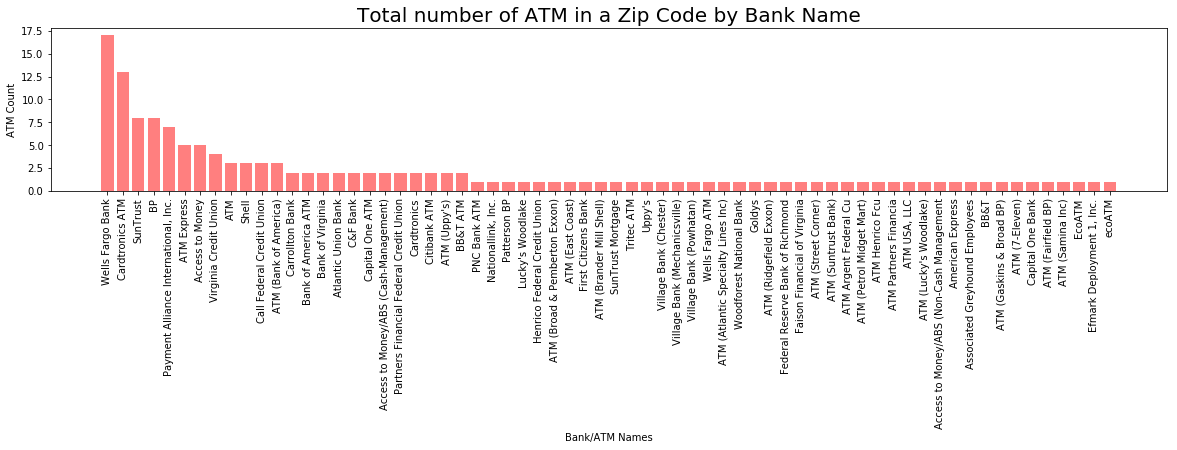

In [26]:
# BarPlot 4......big bar plot.....
# Set x axis and tick locations
x_axis = np.arange(len(zip_indexsort))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, zip_indexsort["Zipcode"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, zip_indexsort["Name"], rotation="vertical")

# Incorporate the other graph properties
plt.title('Total number of ATM in a Zip Code by Bank Name', fontsize=20)
plt.xlabel('Bank/ATM Names')
plt.ylabel('ATM Count')

#plt.bar(x1, y1, color='r', alpha=1, align="center")

plt.savefig("../Desktop/Bar_long_ATM.png")

In [27]:
# creating a dataframe output 
zipgroup3 = merged_df.groupby(["Zipcode"]).agg(
    {"Population":"mean",
    "Name":"count",
    "Population":sum,
    "Per Capita Income":sum}) 
zipgroup3.head(2)

,Population,Name,Per Capita Income
Zipcode,,,
23005,16337.0,1,33766.0
23059,68062.0,2,101958.0


In [29]:
# organizing dataframe grouping on zipcode for ATM count
zipgroup = merged_df.groupby(["Zipcode"])[["Name"]].count()
zip_reindexed = zipgroup.reset_index()
zip_indexsort = zip_reindexed.sort_values(["Name"], ascending=False)
zip_indexsort

,Zipcode,Name
23,23233,20
5,23112,14
2,23060,13
14,23223,11
16,23225,10
29,23831,9
4,23111,8
11,23219,6
21,23230,5
10,23139,5


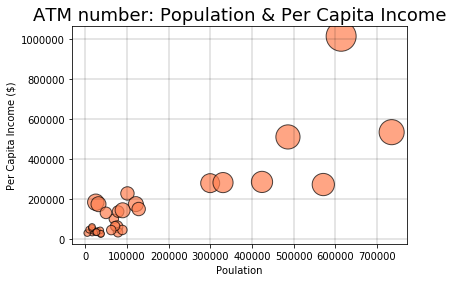

In [30]:
#BUBBLE PLOT
x = zipgroup3["Population"]
y = zipgroup3["Per Capita Income"]
z = zipgroup3["Name"]

bubble = plt.scatter(x, y, s=z*45, alpha=0.7, c="coral",
edgecolors="black")

plt.title("ATM number: Population & Per Capita Income", fontsize=18)
plt.xlabel("Poulation")
plt.ylabel("Per Capita Income ($)")
# Incorporate a text label regarding circle size
#plt.text(42, 36, "Note:")
#plt.text(10000, 10000, "Circle size coorelates with ATM number.")
#need grid lines
plt.grid(which='major', linestyle='-', linewidth='0.2', color='black')
# Create a legend
#plt.legend(title = &quot;City Types&quot;,
#handles = [urban_scatter,
#suburban_scatter,
#rural_scatter],
#labels=[&#39;Urban&#39;,&#39;Suburban&#39;, &#39;Rural&#39;],
#numpoints=1,
#fontsize=10,
#loc=&#39;upper right&#39;,
#shadow=False)
# Save Figure
plt.savefig("../Desktop/Bubbles.png")
# Show plot
plt.show()

In [31]:
split_atm_df

,Name,Lat,Lon,zip_code,ATM_Split
0,Wells Fargo Bank,37.757910,-77.471018,23005,Bank
1,SunTrust,37.678216,-77.586356,23059,Bank
2,Wells Fargo Bank,37.667405,-77.460081,23059,Bank
3,ATM (East Coast),37.643165,-77.564741,23060,Non-Bank
4,ATM Partners Financia,37.651729,-77.460410,23060,Non-Bank
5,"ATM USA, LLC",37.643165,-77.564741,23060,Non-Bank
6,BB&T ATM,37.644726,-77.568981,23060,Bank
7,Capital One Bank,37.665000,-77.566974,23060,Bank
8,Cardtronics ATM,37.642153,-77.560612,23060,Non-Bank
9,Cardtronics ATM,37.651995,-77.610965,23060,Non-Bank


In [32]:
# rename columns
atm_split_df = split_atm_df.rename(columns={'zip_code':'Zipcode','ATM_Split':'ATMsplit'})
atm_split_df.head()

,Name,Lat,Lon,Zipcode,ATMsplit
0,Wells Fargo Bank,37.757910,-77.471018,23005,Bank
1,SunTrust,37.678216,-77.586356,23059,Bank
2,Wells Fargo Bank,37.667405,-77.460081,23059,Bank
3,ATM (East Coast),37.643165,-77.564741,23060,Non-Bank
4,ATM Partners Financia,37.651729,-77.460410,23060,Non-Bank


In [33]:
# group by name
atm_by_name = atm_split_df.groupby('Name').count()

atm_by_name = atm_by_name.reset_index()

atm_by_name_sorted = atm_by_name.sort_values(["Zipcode"],ascending = True)

print(atm_by_name)

                                        Name  Lat  Lon  Zipcode  ATMsplit
0                                        ATM    4    4        4         4
1                             ATM (7-Eleven)    1    1        1         1
2         ATM (Atlantic Specialty Lines Inc)    1    1        1         1
3                      ATM (Bank of America)    3    3        3         3
4                   ATM (Brander Mill Shell)    1    1        1         1
5              ATM (Broad & Pemberton Exxon)    1    1        1         1
6                           ATM (East Coast)    1    1        1         1
7                         ATM (Fairfield BP)    1    1        1         1
8                   ATM (Gaskins & Broad BP)    1    1        1         1
9                     ATM (Lucky's Woodlake)    1    1        1         1
10                  ATM (Petrol Midget Mart)    1    1        1         1
11                    ATM (Ridgefield Exxon)    1    1        1         1
12                          ATM (Samin

In [42]:
# group by split
pie_atm = atm_split_df.groupby('ATMsplit').count()
pie_atm 

,Name,Lat,Lon,Zipcode
ATMsplit,,,,
Bank,73,73,73,73
Non-Bank,75,75,75,75


In [43]:
# Total count of all ATM (needed for calculating percentages for Pie Chart)
all_atm = pie_atm['Name'].sum()
all_atm

148

In [45]:
# Generate total ATM by type for Pie Chart Percentages
total_atm_bytype = atm_split_df.groupby('ATMsplit')['Name'].count()
total_atm_bytype

ATMsplit
Bank        73
Non-Bank    75
Name: Name, dtype: int64

In [46]:
# Calculate Pie Chart Percentages
percent = (total_atm_bytype / all_atm)*100
percent

ATMsplit
Bank        49.324324
Non-Bank    50.675676
Name: Name, dtype: float64

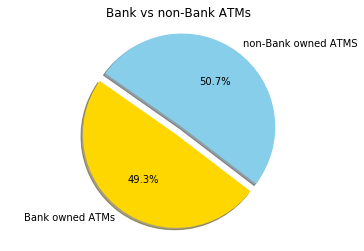

In [49]:
# Pie Chart: Bank vs non-Bank ATMs
# Add title to pie chart
plt.title("Bank vs non-Bank ATMs")
# Labels for the sections of our pie chart
labels = ["Bank owned ATMs", "non-Bank owned ATMS"]
# The values of each section of the pie chart
sizes = [49.32, 50.68]
# The colors of each section of the pie chart
colors = ["gold", "skyblue"]
# Tells matplotlib to seperate the &quot;Python&quot; section from the others
explode = (0, 0.1)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(percent, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Desktop/Pie_ATM.png")
# Show Figure
plt.show()

In [51]:
#Configure gmaps with API key
gmaps.configure(api_key=gkey)


In [59]:
# Use atm_df for heat map
# Store latitude and longitude in locations
locations = atm_df[["Lat", "Lon"]]


In [60]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations,
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# James Miller kindly printed this out for us as we were unable to get this to work on our machines